This Python script is designed to predict the movement of the AAPL index using a machine learning model called Random Forest Classifier. Here’s a breakdown of its functionalities:

* __Importing Libraries:__ The script begins by importing necessary libraries such as yfinance for fetching financial data, pandas for data manipulation, numpy for numerical operations, matplotlib.pyplot for plotting, and sklearn for machine learning tasks.

* __Data Fetching and Preprocessing:__ The script fetches historical data of the AAPL index using yfinance and preprocesses it by dropping unnecessary columns, adding a new column for the next day’s price, and creating a target column indicating whether the price increased or decreased.

* __Feature Selection and Data Splitting:__ The script selects features for the model and splits the data into training and testing sets.

* __Model Training and Evaluation:__ The script initializes a Random Forest Classifier, trains it on the training data, and evaluates its precision on the testing data.

* __Backtesting:__ The script includes a function for backtesting the model on different periods of the historical data.

* __Improving the Model:__ The script adds additional predictors based on rolling averages and trends, retrains the model with these new predictors, and backtests it again.

* __Comparison and Visualization:__ The script compares the initial and new predictions, prints the results, and plots the actual vs. predicted values side by side.

The goal of this script is to analyze the performance of the Random Forest Classifier in predicting the movement of the AAPL index and improve its performance by adding new predictors based on historical trends and rolling averages. The script uses backtesting to evaluate the model’s performance over different periods of the historical data. The precision score is used as the evaluation metric, which measures the proportion of true positive predictions among all positive predictions.

**Results:**

The output of this code provides insights into the performance of the trading strategy. The precision score indicates how often the model is correct when it predicts a price increase. The class distribution shows the proportion of days where the price increased vs. decreased. The plots provide a visual representation of the model’s predictions compared to the actual outcomes. This information can be used to assess the effectiveness of the trading strategy and make necessary adjustments.

In [1]:
# Importing necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [2]:
# Function to make predictions
def predict(train, test, predictors, model):
    # Training the model
    model.fit(train[predictors], train["Target"])
    # Making predictions
    preds = model.predict_proba(test[predictors])[:, 1]
    # Adjusting predictions based on threshold
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

# Function for backtesting
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)


In [3]:
# Fetching S&P 500 data(^^GSPC)
aapl = yf.Ticker("AAPL").history(period="max")
aapl.index = pd.to_datetime(aapl.index)
aapl


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099192,0.099623,0.099192,0.099192,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094448,0.094448,0.094017,0.094017,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087548,0.087548,0.087116,0.087116,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089273,0.089704,0.089273,0.089273,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091861,0.092292,0.091861,0.091861,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-19 00:00:00-04:00,166.210007,166.399994,164.080002,165.000000,67772100,0.0,0.0
2024-04-22 00:00:00-04:00,165.520004,167.259995,164.770004,165.839996,48116400,0.0,0.0
2024-04-23 00:00:00-04:00,165.350006,167.050003,164.919998,166.899994,49537800,0.0,0.0


In [4]:
# Cleaning data
aapl.drop(columns=['Dividends', 'Stock Splits'], inplace=True)

# Adding a new column for the next day's price
aapl["Tomorrow"] = aapl["Close"].shift(-1)

# Adding a target column (1 for price increase, 0 for price decrease)
aapl["Target"] = (aapl["Tomorrow"] > aapl["Close"]).astype(int)

In [5]:
# Filtering data from 2014 to 2024
aapl = aapl['1996':'2024']
aapl

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1996-01-02 00:00:00-05:00,0.243775,0.243775,0.239996,0.242830,139294400,0.242830,0
1996-01-03 00:00:00-05:00,0.241885,0.248500,0.240940,0.242830,429833600,0.238578,0
1996-01-04 00:00:00-05:00,0.244721,0.244721,0.237161,0.238578,300182400,0.258894,1
1996-01-05 00:00:00-05:00,0.239051,0.258894,0.237161,0.258894,445928000,0.261728,1
1996-01-08 00:00:00-05:00,0.260783,0.268342,0.257003,0.261728,121340800,0.247555,0
...,...,...,...,...,...,...,...
2024-04-19 00:00:00-04:00,166.210007,166.399994,164.080002,165.000000,67772100,165.839996,1
2024-04-22 00:00:00-04:00,165.520004,167.259995,164.770004,165.839996,48116400,166.899994,1
2024-04-23 00:00:00-04:00,165.350006,167.050003,164.919998,166.899994,49537800,169.020004,1


In [6]:
aapl.to_csv('filtered_aapl.csv')

<Axes: xlabel='Date'>

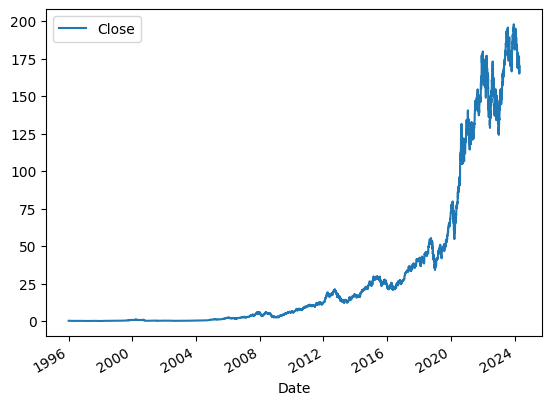

In [7]:
#Plot data from 1996 to 2024
aapl.plot.line(y='Close', use_index=True)

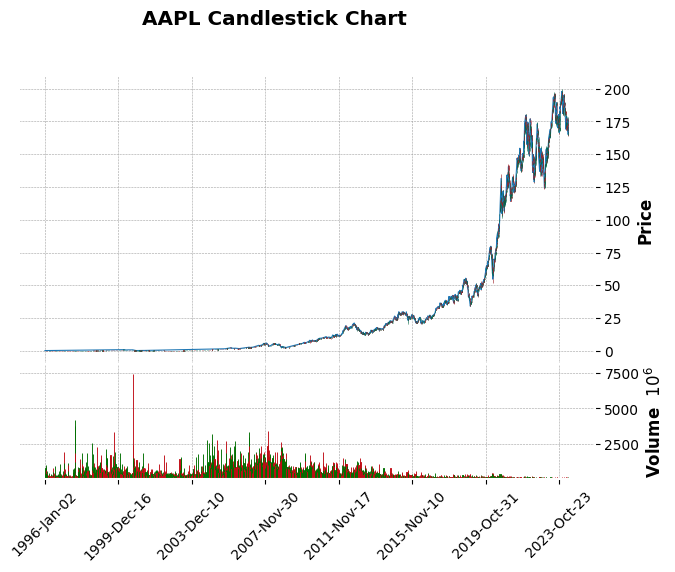

In [9]:
import mplfinance as mpf
aapl.index = pd.to_datetime(aapl.index)
candlestick = mpf.make_addplot(aapl[['Open', 'High', 'Low', 'Close', 'Volume']], type='candle', panel=0)

# Create the plot
mpf.plot(aapl, type='line', addplot=candlestick, volume=True, style='charles', title='AAPL Candlestick Chart')
plt.show()

In [ ]:
# Feature selection
predictors = ['Close', 'Volume', 'Open', 'High', 'Low']

# Splitting data into train and test sets
X = aapl[predictors]
y = aapl['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model initialization
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=42)

# Training the initial model
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=100, random_state=42)

In [ ]:
# Calculating precision of initial model
preds = model.predict(X_test)
accuracy = precision_score(y_test, preds)

# Backtesting with the initial model
initial_predictions = backtest(aapl, model, predictors)

In [ ]:
# Adding additional predictors
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = aapl.rolling(horizon).mean()
    ratio_column = f"Close_Ratio_{horizon}"
    aapl[ratio_column] = aapl["Close"] / rolling_averages["Close"]
    trend_column = f"Trend_{horizon}"
    aapl[trend_column] = aapl.shift(1).rolling(horizon).sum()["Target"]
    new_predictors += [ratio_column, trend_column]


/var/folders/f6/cdmydl6s0dn5k20b1jjvphlw0000gn/T/ipykernel_77650/2196411718.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl[ratio_column] = aapl["Close"] / rolling_averages["Close"]
/var/folders/f6/cdmydl6s0dn5k20b1jjvphlw0000gn/T/ipykernel_77650/2196411718.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl[trend_column] = aapl.shift(1).rolling(horizon).sum()["Target"]


In [ ]:
# Removing NaN values after adding new predictors
aapl.dropna(inplace=True)

# Improving the model with additional predictors
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=42)

# Backtesting with the improved model
new_predictions = backtest(aapl, model, new_predictors)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
# Comparing initial predictions with new predictions
print("Initial Prediction Results:")
print(initial_predictions["Predictions"].value_counts())
print("Precision:", precision_score(initial_predictions["Target"], initial_predictions["Predictions"]))
print("Class Distribution:", initial_predictions["Target"].value_counts() / initial_predictions.shape[0])
print("\nNew Prediction Results:")
print(new_predictions["Predictions"].value_counts())
print("Precision:", precision_score(new_predictions["Target"], new_predictions["Predictions"]))
print("Class Distribution:", new_predictions["Target"].value_counts() / new_predictions.shape[0])

Initial Prediction Results:
0.0    3741
1.0     886
Name: Predictions, dtype: int64
Precision: 0.5079006772009029
Class Distribution: 1    0.52453
0    0.47547
Name: Target, dtype: float64

New Prediction Results:
0.0    3077
1.0     549
Name: Predictions, dtype: int64
Precision: 0.5446265938069217
Class Distribution: 1    0.525924
0    0.474076
Name: Target, dtype: float64


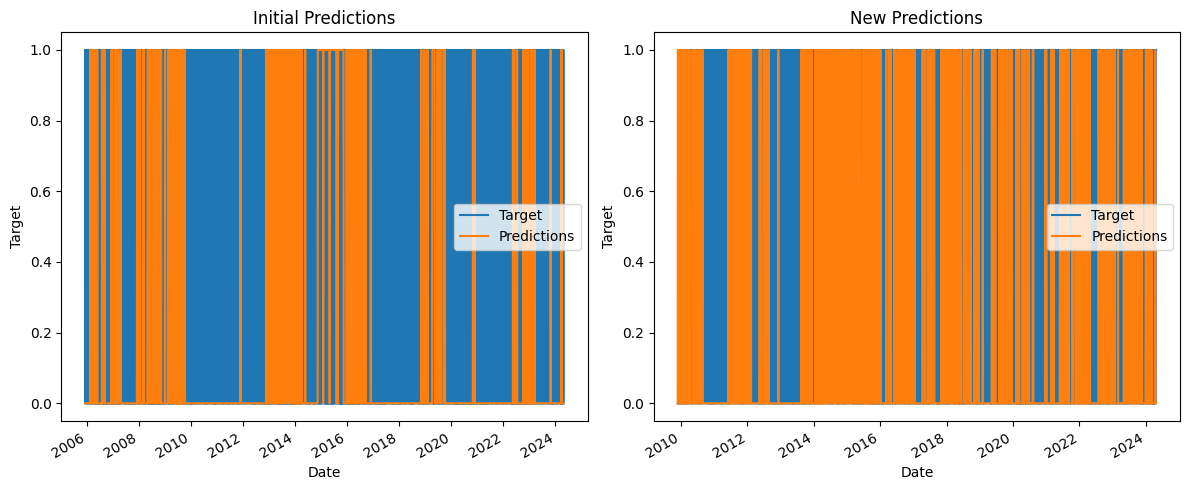

In [ ]:
# Plotting actual vs. predicted values side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotting initial predictions
initial_predictions.plot(ax=axes[0], title='Initial Predictions')
axes[0].set_ylabel('Target')
axes[0].set_xlabel('Date')

# Plotting new predictions
new_predictions.plot(ax=axes[1], title='New Predictions')
axes[1].set_ylabel('Target')
axes[1].set_xlabel('Date')

plt.tight_layout()
plt.show()